In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import mat73
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_rel
from itertools import chain
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from pygam import LinearGAM
import matplotlib.cm as cm
from scipy.stats import linregress, pearsonr


%load_ext autoreload
%autoreload 2

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from GLM_regression import *
from GLM_regression_plotting import *
plt.rcParams.update({'font.size': 12,
                     'axes.spines.right': False,
                     'axes.spines.top':   False,
                     'legend.frameon':    False,})

datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_SST = "SSTindivsomata_GLM"
filepath_SST = os.path.join(datasets_dir, filename_SST+".mat")


datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_NDNF = "NDNFindivsomata_GLM"
filepath_NDNF = os.path.join(datasets_dir, filename_NDNF+".mat")


datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_EC = "EC_GLM"
filepath_EC = os.path.join(datasets_dir, filename_EC+".mat")

activity_dict_SST, factors_dict_SST = preprocess_data(filepath_SST, normalize=True)
activity_dict_NDNF, factors_dict_NDNF = preprocess_data(filepath_NDNF, normalize=True)
activity_dict_EC, factors_dict_EC = preprocess_data(filepath_EC, normalize=True)

filtered_factors_dict_SST = subset_variables_from_data(factors_dict_SST, variables_to_keep=["Velocity"])
filtered_factors_dict_NDNF = subset_variables_from_data(factors_dict_NDNF, variables_to_keep=["Velocity"])
filtered_factors_dict_EC = subset_variables_from_data(factors_dict_EC, variables_to_keep=["Velocity"])


GLM_params_SST, predicted_activity_dict_SST = fit_GLM_population(filtered_factors_dict_SST, activity_dict_SST, quintile=None, regression='ridge', renormalize=True, alphas=None)

GLM_params_NDNF, predicted_activity_dict_NDNF = fit_GLM_population(filtered_factors_dict_NDNF, activity_dict_NDNF, quintile=None, regression='ridge', renormalize=True, alphas=None)
    
GLM_params_EC, predicted_activity_dict_EC = fit_GLM_population(filtered_factors_dict_EC, activity_dict_EC, quintile=None, regression='ridge', renormalize=True, alphas=None)




MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.08198536310151465
non_z_score_MSE 0.08198536310151465


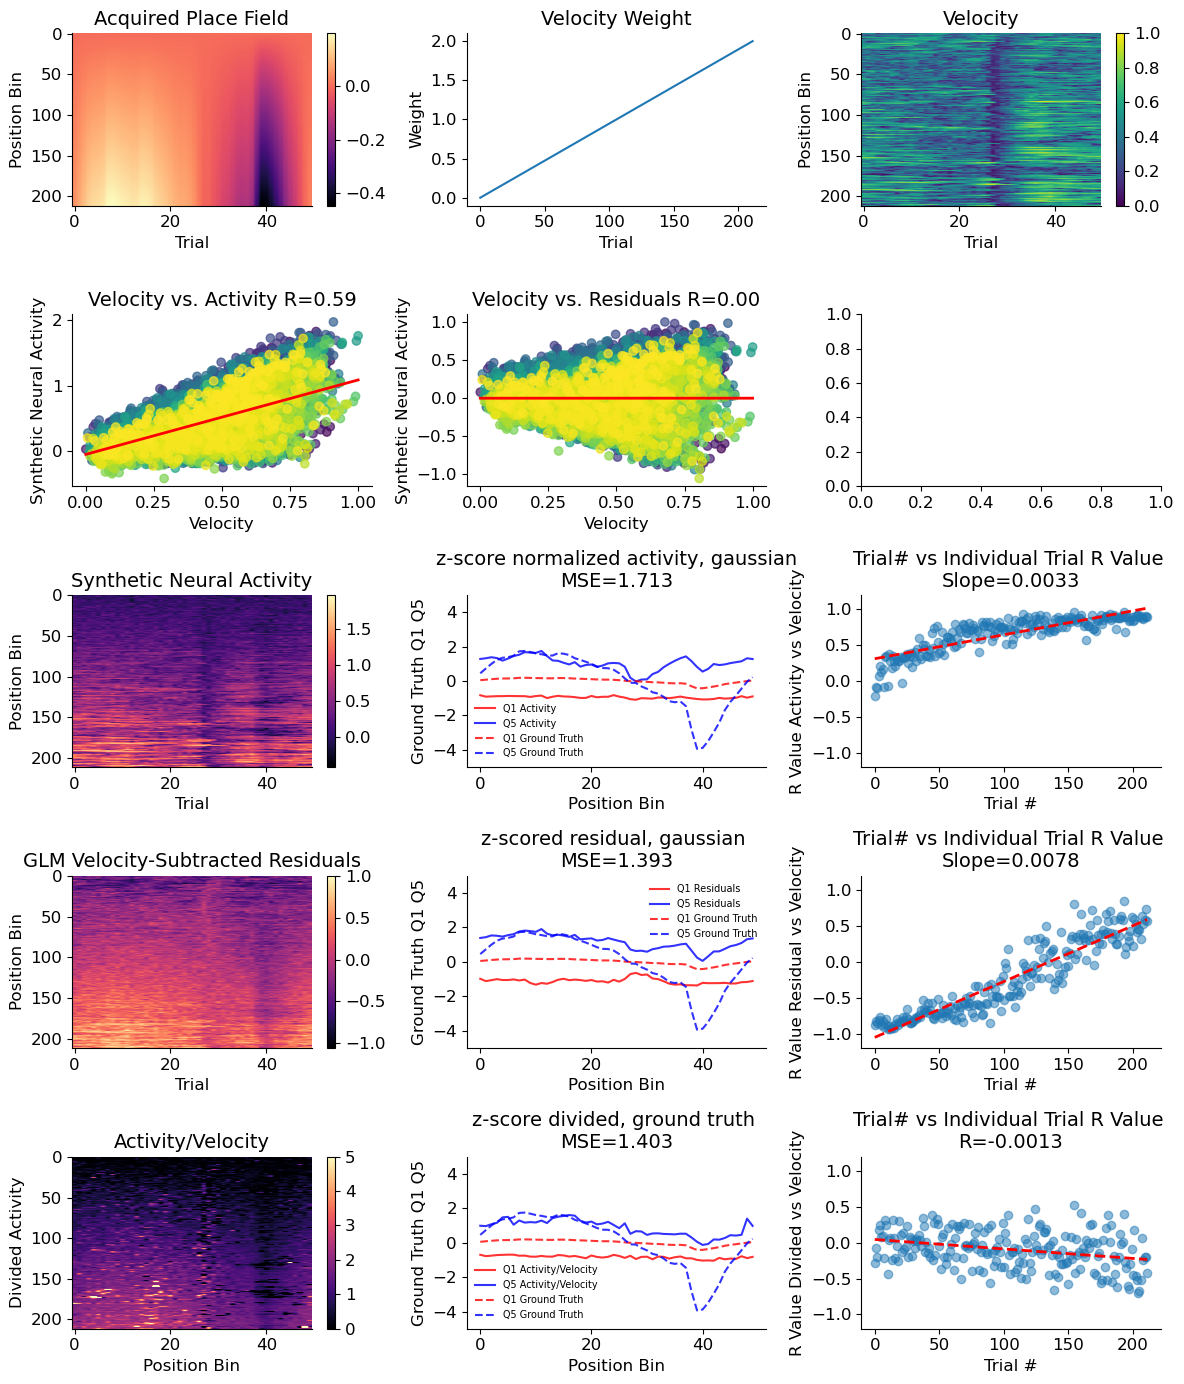

In [20]:
##### velocity plotted over cell trace
 


weight, a, MSE, quintiles_list, mean_quintiles_list, velocity, combined_gaussian_with_velocity, neuron_predicted_activity, residual, divide_data_by_velocity, ramping_field = get_synthetic_data(activity_dict_SST, factors_dict_SST, weight_type="ramping_weight", noise_sf=0.1, ramping_field=True, use_GAM=False, power=1, weight_scale=2, plot=True, field_rotation_factor=12, place_field_sf=1)
plot_synthetic_data(weight, a, MSE, quintiles_list, mean_quintiles_list, velocity, combined_gaussian_with_velocity, neuron_predicted_activity, residual, divide_data_by_velocity, ramping_field=ramping_field, z_score=False)
  


#flat
#weight="ramping_weight
#weight="step_weight
#### ramping wt still linear just chaning in scale with trial

Q0 MSE (Ground Truth - Residual)=0.012
Q1 MSE (Ground Truth - Residual)=0.012
Q2 MSE (Ground Truth - Residual)=0.013
Q3 MSE (Ground Truth - Residual)=0.012
Q4 MSE (Ground Truth - Residual)=0.014
Overall MSE All Quintiles 0.013
field_rotation_factor 12 place_field_sf 1


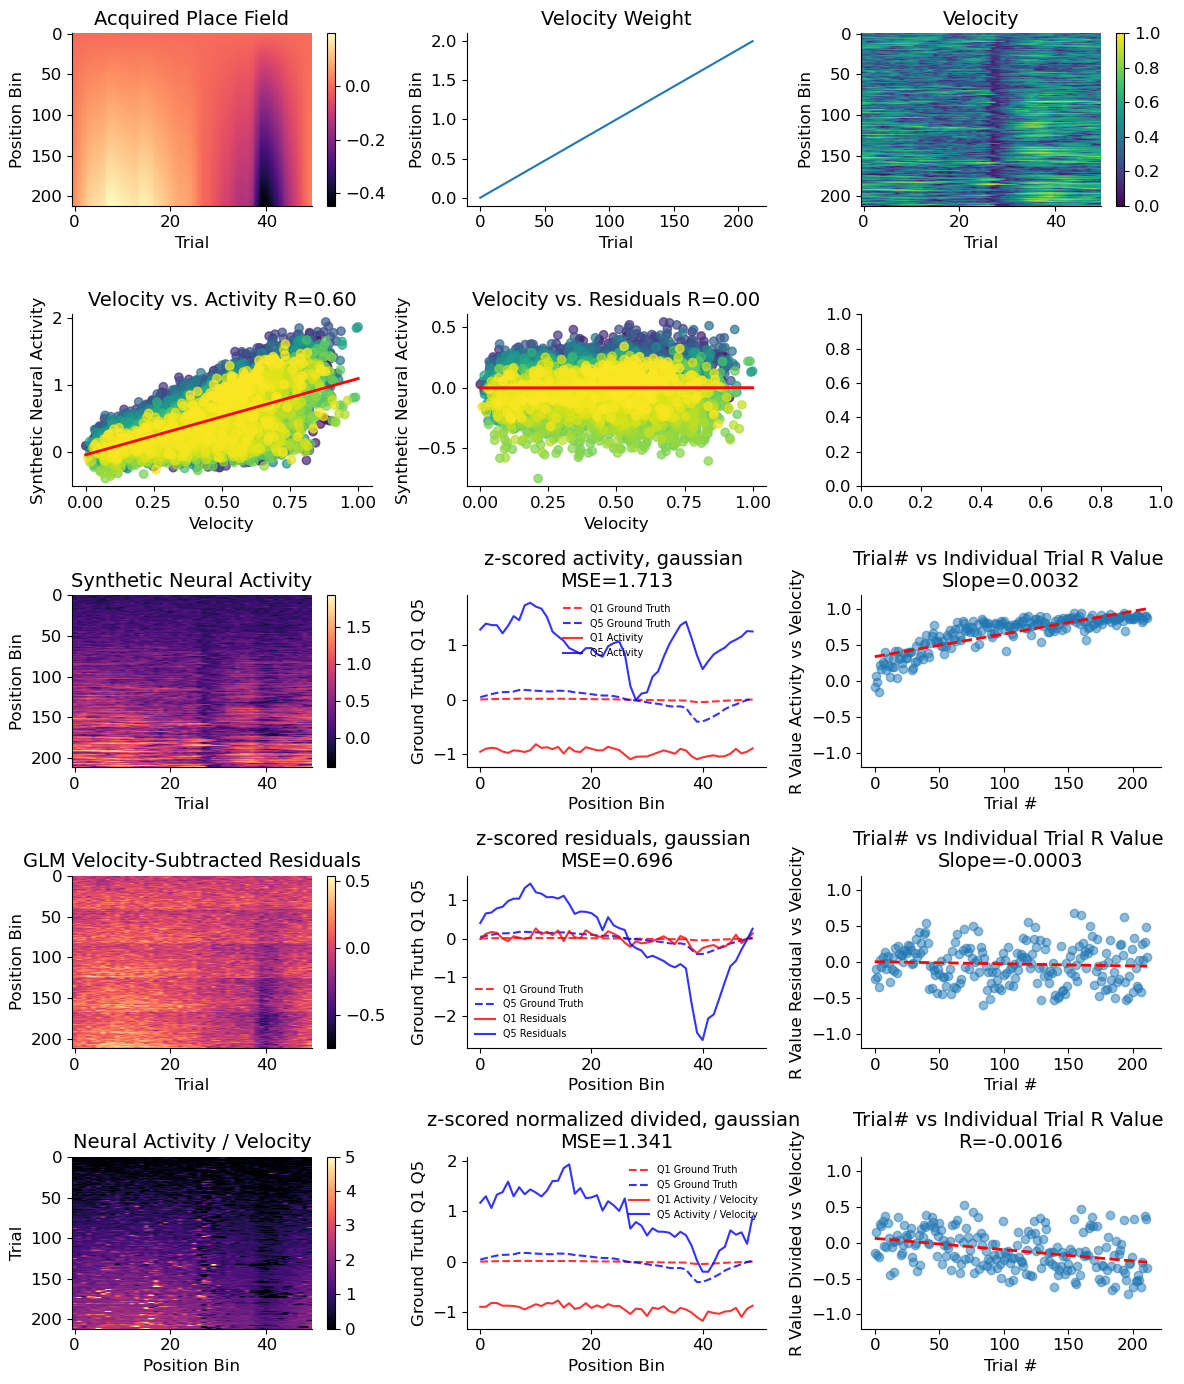

In [23]:
##### velocity plotted over cell trace


        
        
        
weight, a, velocity, combined_gaussian_with_velocity, ground_truth_qunitles_list, list_of_lists, list_of_mean_lists, list_of_arrays, list_of_mean_arrays, MSE, MSE_by_quintile_list, ramping_field = get_synthetic_data_seperate_quintiles(activity_dict_SST, factors_dict_SST, weight_type="ramping_weight", noise_sf=0.1, ramping_field=True, use_GAM=False, power=1, weight_scale=2, cell_type="SST", plot=True, field_rotation_factor=12, place_field_sf=1)

plot_synthetic_data_seperate_quintiles(weight, a, velocity, combined_gaussian_with_velocity, ground_truth_qunitles_list, list_of_lists, list_of_mean_lists, list_of_arrays, list_of_mean_arrays, MSE, MSE_by_quintile_list, ramping_field=ramping_field, z_score=False)
        
        
        
# #flat
# #weight="ramping_weight
# #weight="step_weight
# #### ramping wt still linear just chaning in scale with trial

MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.08212290155679774
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.027764238745141036
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.010296390804447405
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.027605120892260596
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.08109516203075652
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.0803613537208052
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.02798752264665002
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.010215752995075628
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.02796205130937978
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.08128571468947438
MSE Between Ground Truth Place Field and Velcity-Subtracted Residuals 0.08115405670172299
MSE Bet

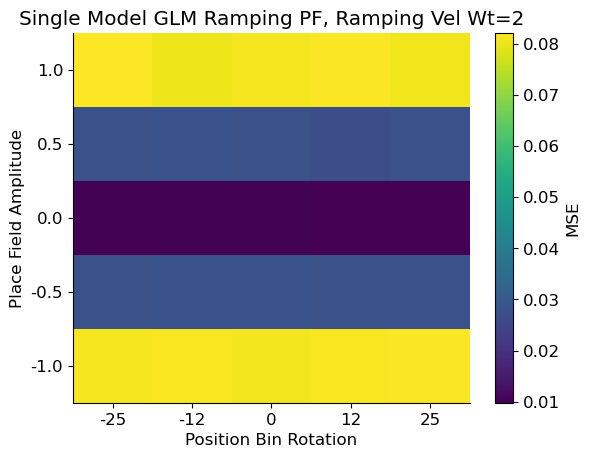

In [15]:


get_MSE_array_and_plot(activity_dict_SST, factors_dict_SST, cell_type="SST", weight_type="ramping_weight", noise_sf=0.1, ramping_field=True, use_GAM=False, power=1, weight_scale=2, multimodel=False)



In [ ]:
num_trials=212
pf_scale = np.linspace(0, place_field_sf, num_trials)

per_cell_velocity = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])

activity_list = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        activity_list.append(np.mean(activity_dict_SST[animal][neuron], axis=1))

neurons_array = np.stack(activity_list)
combined_gaussian = np.mean(neurons_array, axis=0)
num_trials = per_cell_velocity[0].shape[1]

velocity = per_cell_velocity[0]

if weight_type=="flat":
    weight = np.ones(num_trials)

elif weight_type=="ramping_weight":
    weight = pf_scale

elif weight_type=="step_weight":
    weight = np.zeros(num_trials)
    quint = len(weight) // 5

    for i in range(5):
        weight[i * quint: (i + 1) * quint] = (i + 1) / 5

weight = weight * weight_scale

velocity_correlation = weight * velocity**(power)

a = np.tile(combined_gaussian, (num_trials, 1)).T

if ramping_field:
    a = a * pf_scale

a = np.roll(a, shift=field_rotation_factor, axis=0)

noise = noise_sf * np.random.normal(0, 1, a.shape)

combined_gaussian_with_velocity = a + velocity_correlation + noise



neuron_activity_flat = combined_gaussian_with_velocity.flatten()
flattened_velocity = velocity.flatten().reshape(-1, 1)  # Ensure shape compatibility

if use_GAM:
    model = LinearGAM().fit(flattened_data, neuron_activity_flat)
    neuron_predicted_activity = model.predict(flattened_data)
else:
    alphas = [0.1, 1, 10, 100, 1000, 5000]
    model = RidgeCV(alphas=alphas, cv=None)
    model.fit(flattened_data, neuron_activity_flat)
    neuron_predicted_activity = model.predict(flattened_data)

neuron_predicted_activity = neuron_predicted_activity.reshape(velocity.shape)

################## Plotting Residuals

residual = combined_gaussian_with_velocity - neuron_predicted_activity


C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py:580: RuntimeWarning: Method BFGS cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 71.224915
         Iterations: 71
         Function evaluations: 9128
         Gradient evaluations: 172


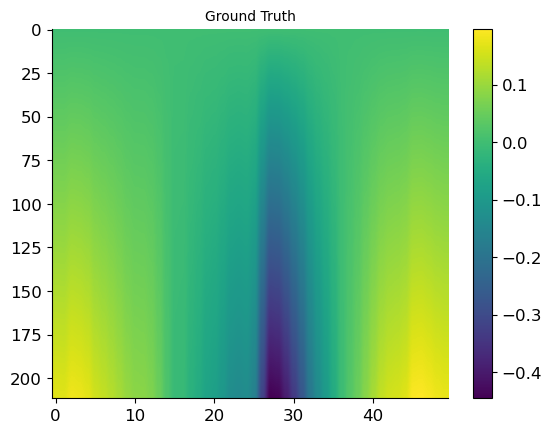

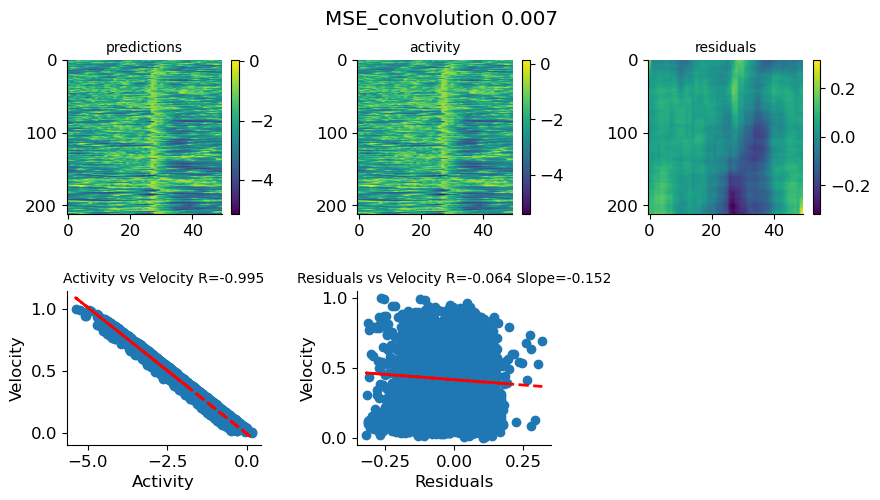

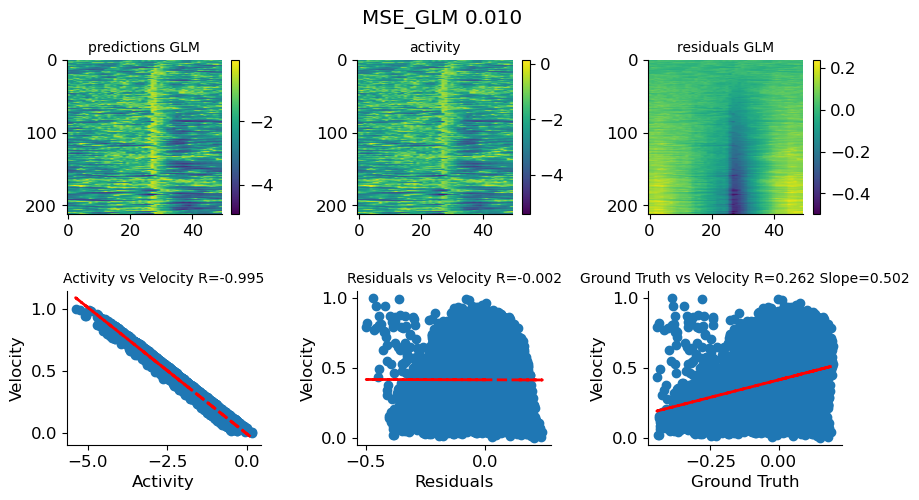

len(optimized_kernel) 51


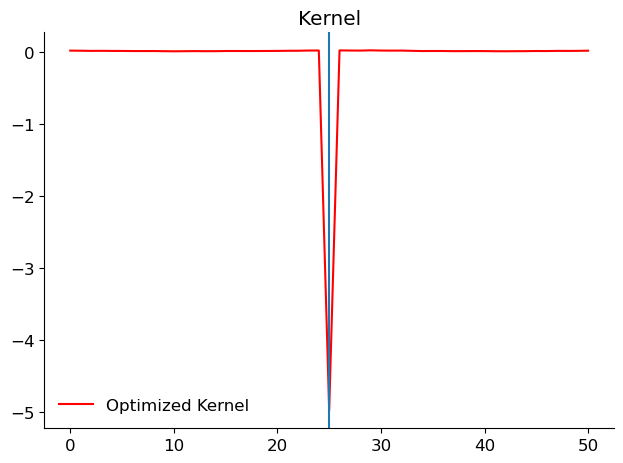

kernel sum -4.061516942388012
weight kernel at center -4.974147327368539
Optimized Bias: -0.39278112771309787
GLM weight [-4.86248598]
GLM intercept -0.05689794971178008


In [69]:
def get_kernel(kernel_length=50, kernel_tau=0.2, center=0.0):
    kernel_t = np.linspace(-1., 1., kernel_length)
    kernel = np.exp(-((kernel_t - center) / kernel_tau)**2.)
    #kernel /= np.sum(kernel)
    return kernel 

cell_number = 12

kernel_length = 51

place_field_sf = 1.0

field_rotation_factor = 0

weight_type = "flat"

weight_scale = -5.0

power = 1.0

noise_sf = 0.0

num_trials=212
pf_scale = np.linspace(0, place_field_sf, num_trials)

per_cell_velocity = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])

activity_list = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        activity_list.append(np.mean(activity_dict_SST[animal][neuron], axis=1))

neurons_array = np.stack(activity_list)
combined_gaussian = np.mean(neurons_array, axis=0)
num_trials = per_cell_velocity[0].shape[1]

velocity = per_cell_velocity[0]
example_cell_velocity = velocity.flatten()

if weight_type=="flat":
    weight = np.ones(num_trials)

elif weight_type=="ramping_weight":
    weight = pf_scale

elif weight_type=="step_weight":
    weight = np.zeros(num_trials)
    quint = len(weight) // 5

    for i in range(5):
        weight[i * quint: (i + 1) * quint] = (i + 1) / 5

weight = weight * weight_scale

velocity_correlation = weight * velocity**(power)

a = np.tile(combined_gaussian, (num_trials, 1)).T

if ramping_field:
    a = a * pf_scale

a = np.roll(a, shift=field_rotation_factor, axis=0)

noise = noise_sf * np.random.normal(0, 1, a.shape)

example_cell_activity = a + velocity_correlation + noise
example_cell_activity = example_cell_activity.flatten()



def blind_deconvolve_error(params, filtered_signal, orig_signal, return_signal=False):    
    kernel = params[:-1] 
    bias = params[-1]  

#     #kernel /= np.sum(kernel)

    guess_filtered_signal = np.convolve(orig_signal, kernel, mode='same')[:len(orig_signal)] + bias

    error = np.sum(np.square(filtered_signal - guess_filtered_signal))
    
    if return_signal:
        return error, guess_filtered_signal
    else:
        return error


init_guess_kernel = np.random.uniform(-1/kernel_length, 1/kernel_length, kernel_length)
init_guess_bias = [0.0] 
initial_guess = np.concatenate([init_guess_kernel, init_guess_bias])

bounds = [(-1, 1)] * kernel_length + [(-5, 5)]

result = minimize(blind_deconvolve_error, x0=initial_guess, args=(example_cell_activity, example_cell_velocity), bounds=bounds, method="BFGS", options={"maxiter": 1000, "eps": 0.01, "disp": True})

final_error, final_guess_filtered_signal = blind_deconvolve_error(result.x, example_cell_activity, example_cell_velocity, return_signal=True)


predictions=final_guess_filtered_signal.reshape(velocity.shape)
activity = example_cell_activity.reshape(velocity.shape)
residuals = activity-predictions
MSE_convolution = np.mean(np.square(residuals))


plt.figure()
plt.title("Ground Truth", fontsize=10)
plt.imshow(a.T, aspect='auto')
plt.colorbar()
plt.show()


fig, axs = plt.subplots(2, 3, figsize=(10,5))

fig.suptitle(f"MSE_convolution {MSE_convolution:.3f}")
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.plot(final_guess_filtered_signal)
plt.title("final_guess_filtered_signal")

axs[0,0].set_title("predictions", fontsize=10)
im1 = axs[0,0].imshow(predictions.T, aspect='auto')
cbar1 = fig.colorbar(im1, ax=axs[0,0])

axs[0,1].set_title("activity", fontsize=10)
im2 = axs[0,1].imshow(activity.T, aspect='auto')
cbar2 = fig.colorbar(im2, ax=axs[0,1])

axs[0,2].set_title("residuals", fontsize=10)
im3 = axs[0,2].imshow(residuals.T, aspect='auto')
cbar3 = fig.colorbar(im3, ax=axs[0,2])


len_activity = len(example_cell_activity)

activity_velocity_correlation, _ = pearsonr(example_cell_activity, example_cell_velocity)
slope, intercept, r_value, p_value, std_err = linregress(example_cell_activity, example_cell_velocity)
trend_line_activity = intercept + slope * example_cell_activity

axs[1,0].set_title(f"Activity vs Velocity R={activity_velocity_correlation:.3f}", fontsize=10)
axs[1,0].scatter(example_cell_activity, example_cell_velocity)
axs[1,0].set_ylabel("Velocity")
axs[1,0].set_xlabel("Activity")
axs[1,0].plot(example_cell_activity, trend_line_activity, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")

flat_residuals = residuals.flatten()

residuals_velocity_correlation, _ = pearsonr(flat_residuals, example_cell_velocity)
slope, intercept, r_value, p_value, std_err = linregress(flat_residuals, example_cell_velocity)
trend_line_residuals = intercept + slope * flat_residuals

axs[1,1].set_title(f"Residuals vs Velocity R={residuals_velocity_correlation:.3f} Slope={slope:.3f}", fontsize=10)
axs[1,1].scatter(flat_residuals, example_cell_velocity)
axs[1,1].set_ylabel("Velocity")
axs[1,1].set_xlabel("Residuals")
axs[1,1].plot(flat_residuals, trend_line_residuals, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")

fig.delaxes(axs[1, 2])

# flat_ground_truth = a.flatten()
# truth_velocity_correlation, _ = pearsonr(flat_ground_truth, example_cell_velocity)
# slope, intercept, r_value, p_value, std_err = linregress(flat_ground_truth, example_cell_velocity)
# trend_line_residuals = intercept + slope * flat_residuals

# axs[1,2].set_title(f"Ground Truth vs Velocity R={truth_velocity_correlation:.3f}", fontsize=10)
# axs[1,2].scatter(flat_ground_truth, example_cell_velocity)
# axs[1,2].set_ylabel("Velocity")
# axs[1,2].set_xlabel("Ground Truth")
# axs[1,2].plot(flat_residuals, trend_line_residuals, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")




plt.tight_layout
plt.show()


################################# GLM prediction 



alphas=None

model = RidgeCV(alphas=alphas if alphas is not None else [0.1, 1, 10, 100, 1000, 5000], cv=None)

model.fit(example_cell_velocity.reshape(-1, 1), example_cell_activity)

neuron_predicted_activity = model.predict(example_cell_velocity.reshape(-1, 1))

neuron_predicted_activity = neuron_predicted_activity.reshape(predictions.shape)

residuals_GLM = activity - neuron_predicted_activity

MSE_GLM = np.mean(np.square(residuals_GLM))


fig, axs = plt.subplots(2, 3, figsize=(10,5))

fig.suptitle(f"MSE_GLM {MSE_GLM:.3f}")
fig.subplots_adjust(wspace=0.5, hspace=0.5)

axs[0, 0].set_title("predictions GLM", fontsize=10)
im1 = axs[0, 0].imshow(neuron_predicted_activity.T, aspect='auto')
cbar1 = fig.colorbar(im1, ax=axs[0, 0])

axs[0, 1].set_title("activity", fontsize=10)
im2 = axs[0, 1].imshow(activity.T, aspect='auto')
cbar2 = fig.colorbar(im2, ax=axs[0, 1])

axs[0, 2].set_title("residuals GLM", fontsize=10)
im3 = axs[0, 2].imshow(residuals_GLM.T, aspect='auto')
cbar2 = fig.colorbar(im3, ax=axs[0, 2])



len_activity = len(example_cell_activity)

activity_velocity_correlation, _ = pearsonr(example_cell_activity, example_cell_velocity)
slope, intercept, r_value, p_value, std_err = linregress(example_cell_activity, example_cell_velocity)
trend_line_activity = intercept + slope * example_cell_activity

axs[1,0].set_title(f"Activity vs Velocity R={activity_velocity_correlation:.3f}", fontsize=10)
axs[1,0].scatter(example_cell_activity, example_cell_velocity)
axs[1,0].set_ylabel("Velocity")
axs[1,0].set_xlabel("Activity")
axs[1,0].plot(example_cell_activity, trend_line_activity, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")

flat_residuals = residuals_GLM.flatten()

residuals_velocity_correlation, _ = pearsonr(flat_residuals, example_cell_velocity)
slope, intercept, r_value, p_value, std_err = linregress(flat_residuals, example_cell_velocity)
trend_line_residuals = intercept + slope * flat_residuals

axs[1,1].set_title(f"Residuals vs Velocity R={residuals_velocity_correlation:.3f}", fontsize=10)
axs[1,1].scatter(flat_residuals, example_cell_velocity)
axs[1,1].set_ylabel("Velocity")
axs[1,1].set_xlabel("Residuals")
axs[1,1].plot(flat_residuals, trend_line_residuals, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")

flat_ground_truth = a.flatten()
truth_velocity_correlation, _ = pearsonr(flat_ground_truth, example_cell_velocity)
slope, intercept, r_value, p_value, std_err = linregress(flat_ground_truth, example_cell_velocity)
trend_line_truth = intercept + slope * flat_ground_truth

axs[1,2].set_title(f"Ground Truth vs Velocity R={truth_velocity_correlation:.3f} Slope={slope:.3f}", fontsize=10)
axs[1,2].scatter(flat_ground_truth, example_cell_velocity)
axs[1,2].set_ylabel("Velocity")
axs[1,2].set_xlabel("Ground Truth")
axs[1,2].plot(flat_ground_truth, trend_line_truth, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")


plt.tight_layout
plt.show()





##################################33





optimized_kernel = result.x[:-1]
optimized_bias = result.x[-1]

# optimized_kernel /= np.sum(optimized_kernel)

print(f"len(optimized_kernel) {len(optimized_kernel)}")




plt.figure()
plt.plot(optimized_kernel, color='r', label="Optimized Kernel")
plt.axvline(x=25)
# plt.plot(kernel_ground_truth, color='b', label="Kernel Ground Truth")
plt.title("Kernel")
plt.legend()

plt.tight_layout()
plt.show()

print(f"kernel sum {np.sum(optimized_kernel)}")

print(f"weight kernel at center {optimized_kernel[25]}")
print(f"Optimized Bias: {optimized_bias}")
print(f"GLM weight {model.coef_}")
print(f"GLM intercept {model.intercept_}")



In [ ]:
############################# getting the kernel that convolves velocoity to get activity

In [4]:
per_cell_velocity = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])

activity_list = []
for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        activity_list.append(activity_dict_SST[animal][neuron])

velocity_flat = per_cell_velocity[0].flatten()
activity_flat = activity_list[0].flatten()

def make_exponential_kernel(length=50, decay_rate=0.1):
    t = np.arange(length)
    kernel = np.exp(-decay_rate * t)
    kernel /= np.sum(kernel)  
    return kernel 

kernel_test = make_exponential_kernel(length=50, decay_rate=0.1)
print(f"AUC Kernel Input: {np.sum(kernel_test)}")

def blind_deconvolve_error(kernel, filtered_signal, orig_signal):    
    guess_filtered_signal = np.convolve(orig_signal, kernel, mode='same')[:len(orig_signal)]
    error = np.sum(np.square(filtered_signal - guess_filtered_signal))
    return error

error = blind_deconvolve_error(kernel_test, activity_flat, velocity_flat)
print(f"error {error}")

AUC Kernel Input: 0.9999999999999999
error 12454.710339580794


optimal_length 50
Optimal Decay Rate: 0.08440726906402644
optimal_shift 10
Optimal Kernel: [0.08215018 0.07550069 0.06938943 0.06377283 0.05861086 0.05386671
 0.04950657 0.04549936 0.0418165  0.03843174 0.03532095 0.03246196
 0.02983439 0.0274195  0.02520008 0.02316031 0.02128564 0.01956272
 0.01797925 0.01652395 0.01518645 0.01395721 0.01282747 0.01178918
 0.01083492 0.00995791 0.00915189 0.0084111  0.00773028 0.00710457
 0.0065295  0.00600099 0.00551525 0.00506883 0.00465854 0.00428146
 0.00393491 0.0036164  0.00332368 0.00305465 0.0028074  0.00258016
 0.00237131 0.00217937 0.00200297 0.00184084 0.00169184 0.00155489
 0.00142904 0.00131337]


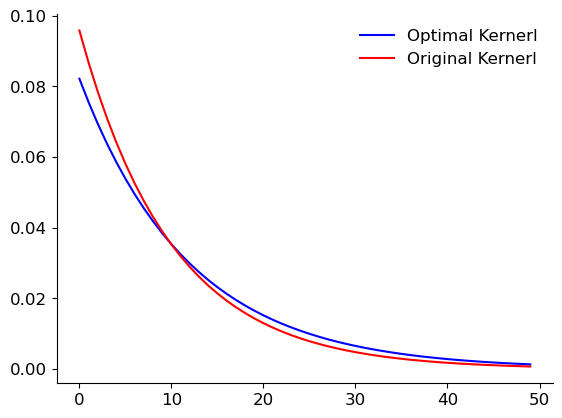

In [10]:
import numpy as np
from scipy.optimize import minimize

def make_exponential_kernel(length=50, decay_rate=0.1, shift=0):
    t = np.arange(length)
    kernel = np.exp(-decay_rate * t)
    kernel /= np.sum(kernel)  # Normalize the kernel
    return kernel 

def blind_deconvolve_error(params, filtered_signal, orig_signal):
    length = int(params[0])
    decay_rate = params[1]
    shift = int(params[2])
    
    kernel = make_exponential_kernel(length=50, decay_rate=decay_rate)
    guess_filtered_signal = np.convolve(orig_signal, kernel, mode='same')[:len(orig_signal)]
    error = np.sum(np.square(filtered_signal - guess_filtered_signal))
    return error

velocity_flat = per_cell_velocity[0].flatten()
activity_flat = activity_list[0].flatten()

def objective(params):
    return blind_deconvolve_error(params, activity_flat, velocity_flat)

initial_guess = [50, 0.1, 10]

bounds = [(10, 100), (0.001, 1.0), (0, 50)]  

result = minimize(objective, initial_guess, bounds=bounds)

optimal_length = int(result.x[0])
optimal_decay_rate = result.x[1]
optimal_shift = int(result.x[2])

print(f"optimal_length {optimal_length}")
print(f"Optimal Decay Rate: {optimal_decay_rate}")
print(f"optimal_shift {optimal_shift}")

optimal_kernel = make_exponential_kernel(length=optimal_length, decay_rate=optimal_decay_rate, shift=optimal_shift)
print(f"Optimal Kernel: {optimal_kernel}")

plt.figure()
plt.plot(optimal_kernel, label="Optimal Kernerl", color='b')
plt.plot(kernel_test, label="Original Kernerl", color='r')
plt.legend()
plt.show()


Optimal Length: 50
Optimal Decay Rate: 0.08193167380907047
Optimal Shift: 10
Optimal Kernel: [0.04497925 0.04497925 0.04497925 0.04497925 0.04497925 0.04497925
 0.04497925 0.04497925 0.04497925 0.04497925 0.04497925 0.04144095
 0.038181   0.03517748 0.03241024 0.02986069 0.02751169 0.02534748
 0.02335352 0.02151642 0.01982382 0.01826438 0.01682761 0.01550387
 0.01428425 0.01316058 0.0121253  0.01117147 0.01029266 0.00948299
 0.00873701 0.00804971 0.00741648 0.00683306 0.00629554 0.0058003
 0.00534402 0.00492363 0.00453631 0.00417946 0.00385068 0.00354777
 0.00326868 0.00301155 0.00277465 0.00255638 0.00235528 0.00217
 0.0019993  0.00184203]


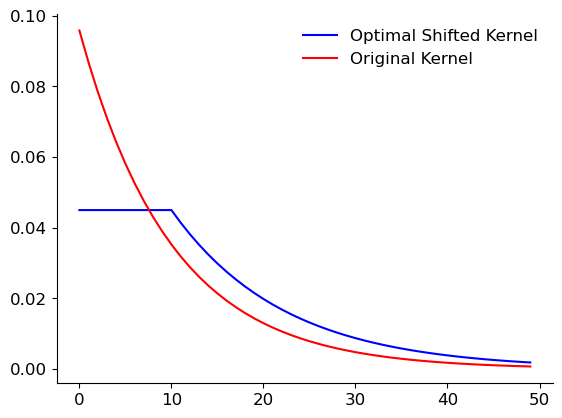

In [12]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def make_shifted_exponential_kernel(length=50, decay_rate=0.1, shift=0):
    t = np.arange(length) - shift
    t[t < 0] = 0  
    kernel = np.exp(-decay_rate * t)
    kernel /= np.sum(kernel)  
    return kernel 

def blind_deconvolve_error(params, filtered_signal, orig_signal):
    length = int(params[0])        
    decay_rate = params[1]         
    shift = int(params[2])         
    
    kernel = make_shifted_exponential_kernel(length=length, decay_rate=decay_rate, shift=shift)
    guess_filtered_signal = np.convolve(orig_signal, kernel, mode='same')[:len(orig_signal)]
    error = np.sum(np.square(filtered_signal - guess_filtered_signal))
    return error

velocity_flat = per_cell_velocity[0].flatten()
activity_flat = activity_list[0].flatten()

def objective(params):
    return blind_deconvolve_error(params, activity_flat, velocity_flat)

initial_guess = [50, 0.1, 10]

bounds = [(10, 100), (0.001, 1.0), (0, 50)]

result = minimize(objective, initial_guess, bounds=bounds)

optimal_length = int(result.x[0])
optimal_decay_rate = result.x[1]
optimal_shift = int(result.x[2])

print(f"Optimal Length: {optimal_length}")
print(f"Optimal Decay Rate: {optimal_decay_rate}")
print(f"Optimal Shift: {optimal_shift}")

optimal_kernel = make_shifted_exponential_kernel(length=optimal_length, decay_rate=optimal_decay_rate, shift=optimal_shift)
print(f"Optimal Kernel: {optimal_kernel}")

plt.figure()
plt.plot(optimal_kernel, label="Optimal Shifted Kernel", color='b')
plt.plot(kernel_test, label="Original Kernel", color='r')
plt.legend()
plt.show()








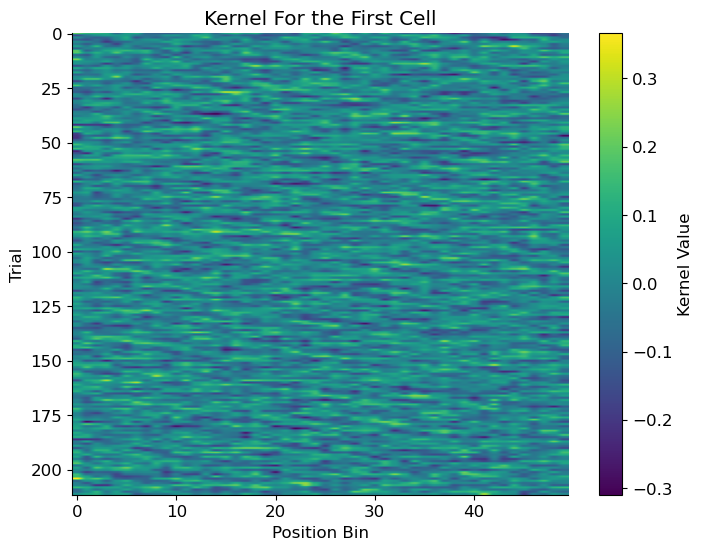

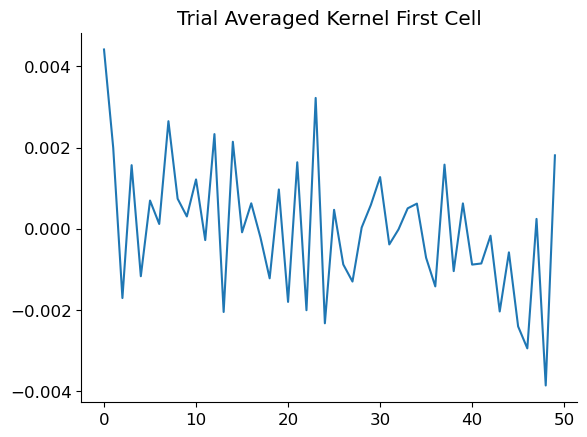

(75, 50)


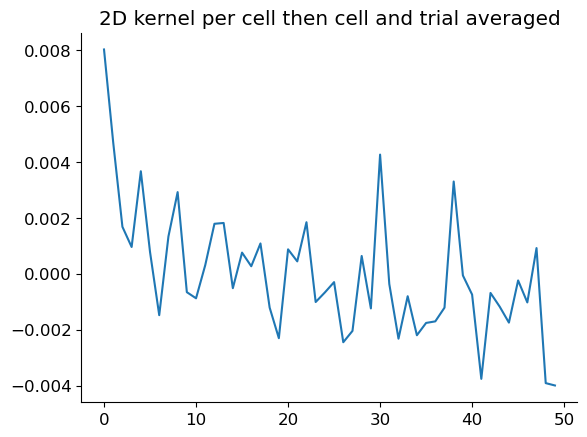

In [68]:

def deconvolve_kernel(neural_activity, velocity, reg_factor=1e-6):

    SF = np.fft.fft2(neural_activity)
    FF = np.fft.fft2(velocity)
    
    GF = SF / (FF + reg_factor)

    kernel = np.fft.ifft2(GF).real  
    
    return kernel




plt.figure(figsize=(8, 6))
plt.imshow(kernel.T, aspect="auto", cmap="viridis")
plt.colorbar(label="Kernel Value")
plt.xlabel("Position Bin")
plt.ylabel("Trial")
plt.title("Kernel For the First Cell")
plt.show()

plt.figure()
plt.plot(np.mean(kernel, axis=1))
plt.title("Trial Averaged Kernel First Cell")
plt.xlabel("Position Bin")
plt.show()

############### getting a kernel for each cell and then taking the average of that 

kernel_list = []

for i in range(len(activity_list)):
    neural_activity = activity_list[i]
    velocity = per_cell_velocity[i]
    kernel = deconvolve_kernel(neural_activity, velocity, reg_factor=1e-6)
    kernel_list.append(np.mean(kernel, axis=1))
    
kernel_array = np.array(kernel_list)
print(kernel_array.shape)
cell_average_kernel = np.mean(kernel_array, axis=0)

plt.figure()
plt.plot(cell_average_kernel)
plt.title("2D kernel per cell then cell and trial averaged")
plt.xlabel("Position Bin")
plt.show()

    

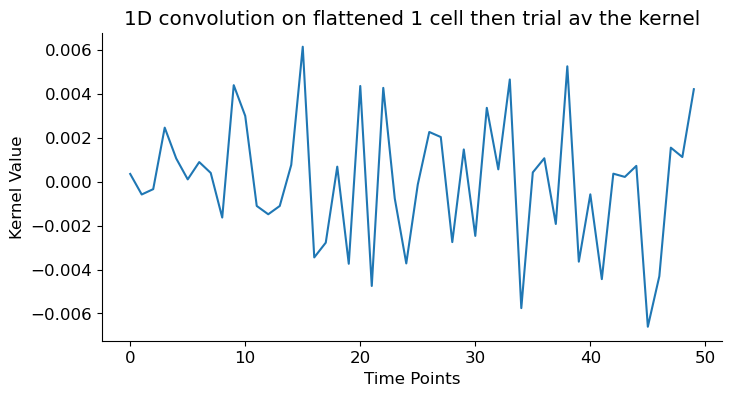

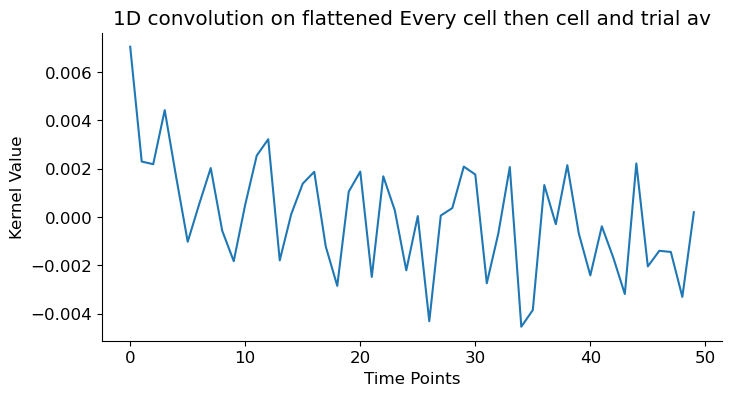

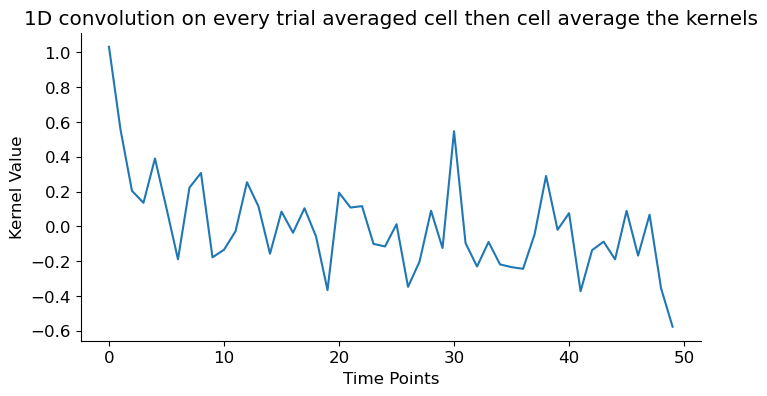

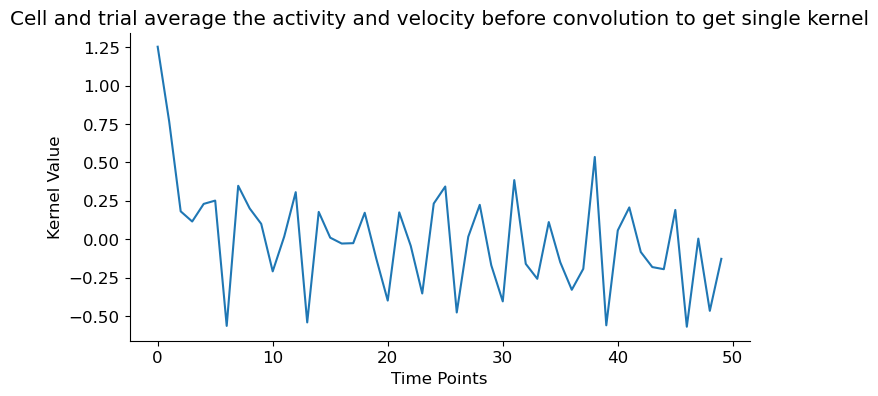

In [85]:

def deconvolve_kernel_1d(neural_activity, velocity, reg_factor=1e-6):
    
    neural_activity = neural_activity.flatten()
    velocity = velocity.flatten()
    
    
    SF = np.fft.fft(neural_activity)
    FF = np.fft.fft(velocity)
    
    GF = SF / (FF + reg_factor)
    
    kernel = np.fft.ifft(GF).real  # Take real part

    return kernel


neural_activity_1d = activity_list[0].flatten()
velocity_1d = per_cell_velocity[0].flatten()

kernel_1d = deconvolve_kernel_1d(neural_activity_1d, velocity_1d)
kernel_1d = kernel_1d.reshape(activity_list[0].shape)
trial_av_kernel = np.mean(kernel_1d, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(trial_av_kernel)
plt.xlabel("Time Points")
plt.ylabel("Kernel Value")
plt.title("1D convolution on flattened 1 cell then trial av the kernel")
plt.show()

#### average of all the kernels== kernels see all the data  

kernel_list = []

for i in range(len(activity_list)):
    neural_activity_1d = activity_list[i].flatten()
    velocity_1d = per_cell_velocity[i].flatten()

    kernel_1d = deconvolve_kernel_1d(neural_activity_1d, velocity_1d)
    kernel_1d = kernel_1d.reshape(activity_list[i].shape)
    kernel_list.append(np.mean(kernel_1d, axis=1))

kernel_array = np.array(kernel_list)
kernel = np.mean(kernel_array, axis=0)
    
plt.figure(figsize=(8, 4))
plt.plot(kernel)
plt.xlabel("Time Points")
plt.ylabel("Kernel Value")
plt.title("1D convolution on flattened Every cell then cell and trial av")
plt.show()


kernel_list = []

for i in range(len(activity_list)):
    neural_activity_1d = np.mean(activity_list[i], axis=1)
    velocity_1d = np.mean(per_cell_velocity[i], axis=1)

    kernel_1d = deconvolve_kernel_1d(neural_activity_1d, velocity_1d)
    kernel_list.append(kernel_1d)
    
kernel_array = np.array(kernel_list)
kernel = np.mean(kernel_array, axis=0)
    
plt.figure(figsize=(8, 4))
plt.plot(kernel)
plt.xlabel("Time Points")
plt.ylabel("Kernel Value")
plt.title("1D convolution on every trial averaged cell then cell average the kernels")
plt.show()



cell_and_trial_averaged_activity = []
cell_and_trial_averaged_velocity = []

for i in range(len(activity_list)):
    neural_activity_1d = np.mean(activity_list[i], axis=1)
    cell_and_trial_averaged_activity.append(neural_activity_1d)
    velocity_1d = np.mean(per_cell_velocity[i], axis=1)
    cell_and_trial_averaged_velocity.append(velocity_1d)
    
cell_and_trial_averaged_activity_array = np.stack(cell_and_trial_averaged_activity)
cell_and_trial_averaged_velocity_array = np.stack(cell_and_trial_averaged_velocity)

activity = np.mean(cell_and_trial_averaged_activity_array, axis=0)
velocity = np.mean(cell_and_trial_averaged_velocity_array, axis=0)

kernel_average = deconvolve_kernel_1d(activity, velocity)

plt.figure(figsize=(8, 4))
plt.plot(kernel_average)
plt.xlabel("Time Points")
plt.ylabel("Kernel Value")
plt.title("Cell and trial average the activity and velocity before convolution to get single kernel")
plt.show()

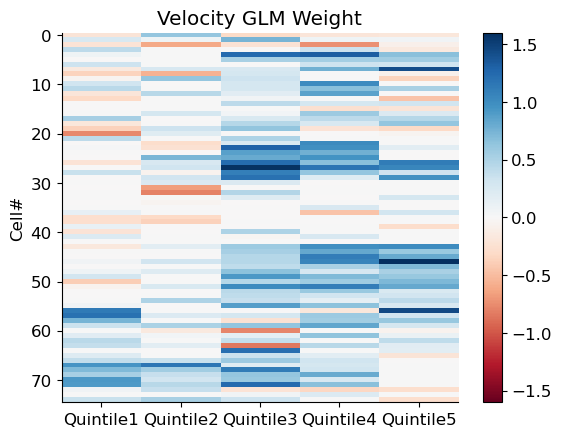

In [353]:


def get_weights_per_quintile(activity_dict_SST, use_GAM=False):
    per_cell_velocity = []
    for animal in activity_dict_SST:
        for neuron in activity_dict_SST[animal]:
            per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])
            
    

    activity_list = []
    for animal in activity_dict_SST:
        for neuron in activity_dict_SST[animal]:
            activity_list.append(activity_dict_SST[animal][neuron])  

    each_cell_weights_list = []

    for idx, cell in enumerate(activity_list):
        num_trials = cell.shape[1]  
        quintile_size = num_trials // 5  

        gaussian_quintiles = [] 
        velocity_quintiles = []
        ground_truth_quintiles_list = []

        for i in range(5):  
            start_idx = i * quintile_size 
            end_idx = num_trials if i == 4 else (i + 1) * quintile_size  

            gaussian_quintile = cell[:, start_idx:end_idx] 
            gaussian_quintiles.append(gaussian_quintile) 

            velocity_quintile = per_cell_velocity[i][:, start_idx:end_idx] 
            velocity_quintiles.append(velocity_quintile)

            ground_truth_quintile = a[:, start_idx:end_idx]
            ground_truth_quintiles_list.append(ground_truth_quintile)

        weight_per_quintile_list = []

        for i in range(5):
            gaussian_quintile  = gaussian_quintiles[i]
            velocity_quintile = velocity_quintiles[i]

            neuron_activity_flat = gaussian_quintile.flatten()
            flattened_velocity = velocity_quintile.flatten().reshape(-1, 1)  

            if use_GAM:
                model = LinearGAM().fit(flattened_velocity, neuron_activity_flat)
                weight = model.coef_  
            else:
                alphas = [0.1, 1, 10, 100, 1000, 5000]
                model = RidgeCV(alphas=alphas, cv=None)
                model.fit(flattened_velocity, neuron_activity_flat)
                weight = model.coef_[0]

            weight_per_quintile_list.append(weight) 

        each_cell_weights_list.append(weight_per_quintile_list)
        
    return each_cell_weights_list

each_cell_weights_list = get_weights_per_quintile(activity_dict_SST, use_GAM=False)


def plot_weights_per_quintile(each_cell_weights_list):

    each_cell_weights_list_array = np.array(each_cell_weights_list)
    
    plt.imshow(each_cell_weights_list_array, aspect="auto", cmap='RdBu', vmin=-1.6, vmax=1.6)
    plt.xticks(ticks=np.arange(5), labels=[f"Quintile{i+1}" for i in range(5)])
    plt.ylabel("Cell#")
    plt.title("Velocity GLM Weight")
    plt.colorbar()
    plt.plot()

plot_weights_per_quintile(each_cell_weights_list)



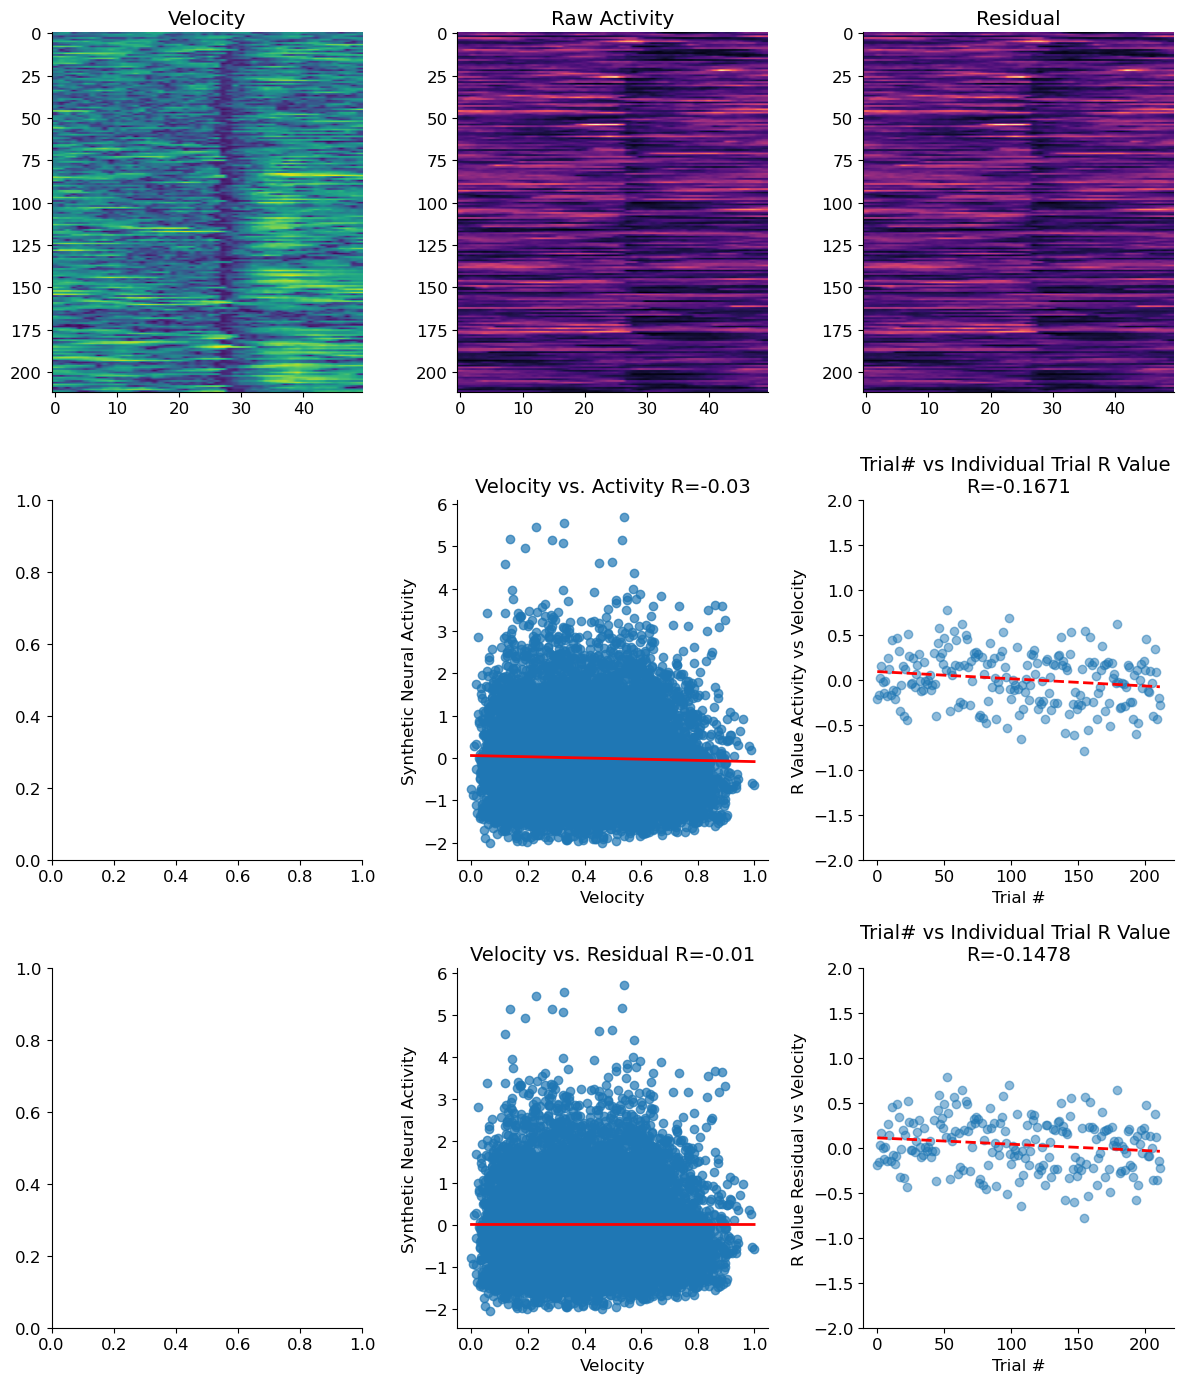

In [149]:

neuron_activity_list, predictions_list, cell_residual_list = get_neuron_activity_prediction_residual(activity_dict_SST, predicted_activity_dict_SST)
velocity = per_cell_velocity[0]
activity = neuron_activity_list[0]
residual = cell_residual_list[0]
prediction = predictions_list[0]

fig, axs = plt.subplots(3,3,  figsize=(12, 14))

axs[0, 0].imshow(velocity.T, aspect="auto")
axs[0, 0].set_title("Velocity")

axs[0, 1].imshow(activity.T, aspect="auto", cmap='magma')
axs[0, 1].set_title("Raw Activity")

axs[0, 2].imshow(residual.T, aspect="auto", cmap='magma')
axs[0, 2].set_title("Residual")

prediction_velocity_correlation_list = []
activity_velocity_correlation_list = []
residual_velocity_correlation_list = []

for i in range(activity.shape[1]):
    trial_predicted_activity = prediction[:, i]
    trial_velocity = velocity[:, i]
    trial_activity = activity[:, i]
    trial_residual = residual[:, i]

    prediction_velocity_correlation, _ = pearsonr(trial_predicted_activity, trial_velocity)
    prediction_velocity_correlation_list.append(prediction_velocity_correlation)

    activity_velocity_correlation, _ = pearsonr(trial_activity, trial_velocity)
    activity_velocity_correlation_list.append(activity_velocity_correlation)

    residual_velocity_correlation, _ = pearsonr(trial_residual, trial_velocity)
    residual_velocity_correlation_list.append(residual_velocity_correlation)
    
    
    
    
    
num_trials = residual.shape[1] 
quintile_size = num_trials // 5

divide_data_by_velocity = np.where(velocity != 0, combined_gaussian_with_velocity / velocity, 0)

residual_q1 = residual[:, :quintile_size]  
residual_q5 = residual[:, -quintile_size:] 

activity_q1 = activity[:, :quintile_size]
activity_q5 = activity[:, -quintile_size:]

divided_q1 = divide_data_by_velocity[:, :quintile_size]
divided_q5 = divide_data_by_velocity[:, -quintile_size:]

mean_residual_q1 = np.mean(residual_q1, axis=1)
mean_residual_q5 = np.mean(residual_q5, axis=1)

mean_activity_q1 = np.mean(activity_q1, axis=1)
mean_activity_q5 = np.mean(activity_q5, axis=1)

mean_divided_q1 = np.mean(divided_q1, axis=1)
mean_divided_q5 = np.mean(divided_q5, axis=1)



axs[1, 0].plot(mean_activity_q1, color='r', label="Q1 Activity", marker='o', markersize=3, alpha=0.8)
axs[1, 0].plot(mean_activity_q5, color='b', label="Q5 Activity", marker='x', markersize=3, alpha=0.8)
axs[1, 0].set_xlabel("Position Bin", fontsize=12)
axs[1, 0].set_ylabel("Mean Activity", fontsize=12)
axs[1, 0].set_title("Mean Neural Activity Q1 Q5", fontsize=14)
axs[1, 0].set_ylim(min_data1-0.2, max_data1+0.2)
axs[1, 0].legend(fontsize=10)
    
flat_velocity = velocity.flatten()
flat_activity = activity.flatten()

slope, intercept, r_value, p_value, std_err = linregress(flat_velocity, flat_activity)
x_vals = np.linspace(flat_velocity.min(), flat_velocity.max(), 100)
y_vals = slope * x_vals + intercept

velocity_activity_corr, _ = pearsonr(flat_velocity, flat_activity)
axs[1, 1].scatter(flat_velocity, flat_activity, alpha=0.7)
axs[1, 1].plot(x_vals, y_vals, color='red', linewidth=2, label="Best Fit Line")
axs[1, 1].set_xlabel("Velocity", fontsize=12)
axs[1, 1].set_ylabel("Synthetic Neural Activity", fontsize=12)
axs[1, 1].set_title(f"Velocity vs. Activity R={velocity_activity_corr:.2f}", fontsize=14)
    
    
    
trial_numbers=np.arange(len(activity_velocity_correlation_list))
slope, intercept, r_value, p_value, std_err = linregress(trial_numbers, activity_velocity_correlation_list)
trend_line = intercept + slope*trial_numbers

activity_corr_array = np.array(activity_velocity_correlation_list)
r_value_over_trials, _ = pearsonr(trial_numbers, activity_corr_array)

axs[1, 2].scatter(trial_numbers, activity_velocity_correlation_list, alpha=0.5, label="Data")
axs[1, 2].plot(trial_numbers, trend_line, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")
axs[1, 2].set_xlabel("Trial #", fontsize=12)
axs[1, 2].set_ylabel("R Value Activity vs Velocity", fontsize=12)
axs[1, 2].set_title(f"Trial# vs Individual Trial R Value \nR={r_value_over_trials:.4f}", fontsize=14)
axs[1, 2].set_ylim(-2, 2)





    
flat_velocity = velocity.flatten()
flat_residual = residual.flatten()

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(flat_velocity, flat_residual)
x_vals2 = np.linspace(flat_velocity.min(), flat_velocity.max(), 100)
y_vals2 = slope * x_vals + intercept2

velocity_residual_corr, _ = pearsonr(flat_velocity, flat_residual)
axs[2, 1].scatter(flat_velocity, flat_residual, alpha=0.7)
axs[2, 1].plot(x_vals2, y_vals2, color='red', linewidth=2, label="Best Fit Line")
axs[2, 1].set_xlabel("Velocity", fontsize=12)
axs[2, 1].set_ylabel("Synthetic Neural Activity", fontsize=12)
axs[2, 1].set_title(f"Velocity vs. Residual R={velocity_residual_corr:.2f}", fontsize=14)


    
    
trial_numbers=np.arange(len(residual_velocity_correlation_list))
slope, intercept, r_value, p_value, std_err = linregress(trial_numbers, residual_velocity_correlation_list)
trend_line = intercept + slope*trial_numbers

residual_corr_array = np.array(residual_velocity_correlation_list)
r_value_over_trials, _ = pearsonr(trial_numbers, residual_corr_array)

axs[2, 2].scatter(trial_numbers, residual_velocity_correlation_list, alpha=0.5, label="Data")
axs[2, 2].plot(trial_numbers, trend_line, color="red", linewidth=2, linestyle="dashed", label=f"Trend (slope={slope:.4f})")
axs[2, 2].set_xlabel("Trial #", fontsize=12)
axs[2, 2].set_ylabel("R Value Residual vs Velocity", fontsize=12)
axs[2, 2].set_title(f"Trial# vs Individual Trial R Value \nR={r_value_over_trials:.4f}", fontsize=14)
axs[2, 2].set_ylim(-2, 2)












plt.tight_layout()
plt.show()




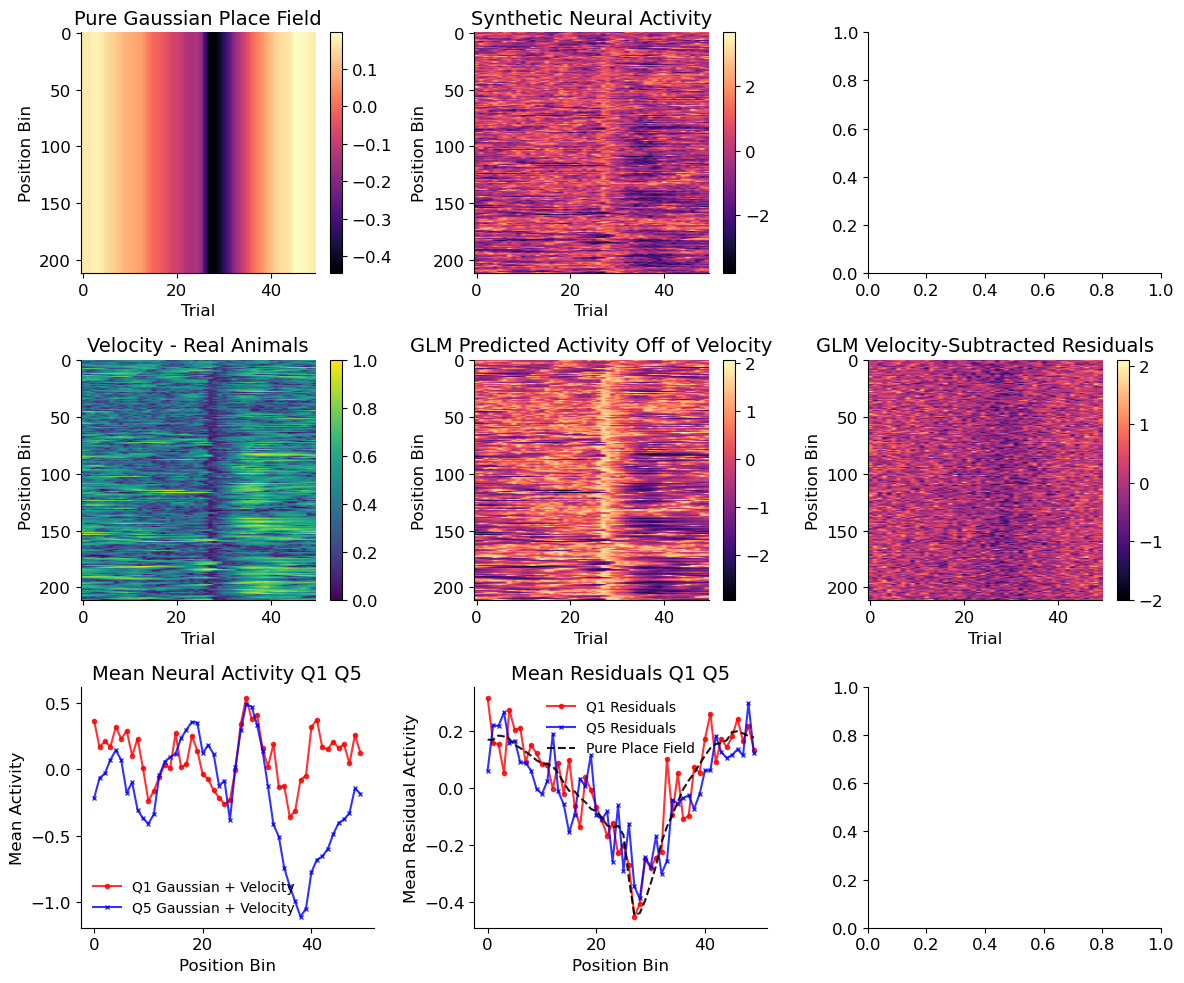

In [5]:
##### velocity plotted over cell trace

weight = -5
noise_sf = 0.5
pf_scale = np.linspace(0, 1, 212)
# pf_position = 


per_cell_velocity = []

for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])

        
x = np.arange(50)

activity_list = []

for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        activity_list.append(np.mean(activity_dict_SST[animal][neuron], axis=1))

neurons_array = np.stack(activity_list) 
combined_gaussian = np.mean(neurons_array, axis=0)

num_trials = per_cell_velocity[0].shape[1]


################# plotting pure gaussian place fields

a = np.tile(combined_gaussian, (num_trials, 1)).T

################# pure velocity data

velocity = per_cell_velocity[0]

################# plotting velocity-correlated activity


velocity_correlation = weight*velocity

combined_gaussian_with_velocity = a + velocity_correlation

combined_gaussian_with_velocity = (combined_gaussian_with_velocity - np.mean(combined_gaussian_with_velocity)) / np.std(combined_gaussian_with_velocity)

noise = noise_sf * np.random.normal(0, 1, a.shape)
combined_gaussian_with_velocity = combined_gaussian_with_velocity + noise


################# fitting a GLM and getting velocity prediction 

neuron_activity_flat = combined_gaussian_with_velocity.flatten()
flattened_data = velocity.flatten()

alphas=None

model = RidgeCV(alphas=alphas if alphas is not None else [0.1, 1, 10, 100, 1000, 5000], cv=None)

model.fit(flattened_data.reshape(-1, 1), neuron_activity_flat)

neuron_predicted_activity = model.predict(flattened_data.reshape(-1, 1))

neuron_predicted_activity = neuron_predicted_activity.reshape(velocity.shape)


################## plotting the residuals 

residual = combined_gaussian_with_velocity - neuron_predicted_activity


################## plotting quintiles 


num_trials = residual.shape[1] 
quintile_size = num_trials // 5

residual_q1 = residual[:, :quintile_size]  # First 1/5th
residual_q5 = residual[:, -quintile_size:]  # Last 1/5th

gaussian_q1 = combined_gaussian_with_velocity[:, :quintile_size]
gaussian_q5 = combined_gaussian_with_velocity[:, -quintile_size:]


mean_residual_q1 = np.mean(residual_q1, axis=1)
mean_residual_q5 = np.mean(residual_q5, axis=1)

mean_gaussian_q1 = np.mean(gaussian_q1, axis=1)
mean_gaussian_q5 = np.mean(gaussian_q5, axis=1)


#############################

fig, axs = plt.subplots(3, 3, figsize=(12, 10))  # Increase figure size

im1 = axs[0, 0].imshow(a.T, cmap='magma', aspect='auto')
axs[0, 0].set_xlabel("Trial", fontsize=12)
axs[0, 0].set_ylabel("Position Bin", fontsize=12)
axs[0, 0].set_title("Pure Gaussian Place Field", fontsize=14)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(combined_gaussian_with_velocity.T, cmap='magma', aspect='auto')
axs[0, 1].set_xlabel("Trial", fontsize=12)
axs[0, 1].set_ylabel("Position Bin", fontsize=12)
axs[0, 1].set_title("Synthetic Neural Activity", fontsize=14)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(velocity.T, cmap='viridis', aspect='auto')
axs[1, 0].set_title("Velocity - Real Animals", fontsize=14)
axs[1, 0].set_xlabel("Trial", fontsize=12)
axs[1, 0].set_ylabel("Position Bin", fontsize=12)
fig.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(neuron_predicted_activity.T, cmap='magma', aspect='auto')
axs[1, 1].set_xlabel("Trial", fontsize=12)
axs[1, 1].set_ylabel("Position Bin", fontsize=12)
axs[1, 1].set_title("GLM Predicted Activity Off of Velocity", fontsize=14)
fig.colorbar(im4, ax=axs[1, 1])

im5 = axs[1, 2].imshow(residual.T, cmap='magma', aspect='auto')
axs[1, 2].set_xlabel("Trial", fontsize=12)
axs[1, 2].set_ylabel("Position Bin", fontsize=12)
axs[1, 2].set_title("GLM Velocity-Subtracted Residuals", fontsize=14)
fig.colorbar(im5, ax=axs[1, 2])

axs[2, 0].plot(mean_gaussian_q1, color='r', label="Q1 Gaussian + Velocity", marker='o', markersize=3, alpha=0.8)
axs[2, 0].plot(mean_gaussian_q5, color='b', label="Q5 Gaussian + Velocity", marker='x', markersize=3, alpha=0.8)
axs[2, 0].set_xlabel("Position Bin", fontsize=12)
axs[2, 0].set_ylabel("Mean Activity", fontsize=12)
axs[2, 0].set_title("Mean Neural Activity Q1 Q5", fontsize=14)
axs[2, 0].legend(fontsize=10)

axs[2, 1].plot(mean_residual_q1, color='r', label="Q1 Residuals", marker='o', markersize=3, alpha=0.8)
axs[2, 1].plot(mean_residual_q5, color='b', label="Q5 Residuals", marker='x', markersize=3, alpha=0.8)
axs[2, 1].plot(combined_gaussian, color="k", label="Pure Place Field", linestyle="--", alpha=0.9)
axs[2, 1].set_xlabel("Position Bin", fontsize=12)
axs[2, 1].set_ylabel("Mean Residual Activity", fontsize=12)
axs[2, 1].set_title("Mean Residuals Q1 Q5", fontsize=14)
axs[2, 1].legend(fontsize=10)

plt.tight_layout() 
plt.show()



residual_q1.shape (50, 42)
velocity_q1.shape (50, 42)
gaussian_q1.shape (50, 42)
velocity_q1.shape (50, 42)
residual_q1.shape (50, 42)
velocity_q1.shape (50, 42)
gaussian_q1.shape (50, 42)
velocity_q1.shape (50, 42)
residual_q1.shape (50, 42)
velocity_q1.shape (50, 42)
gaussian_q1.shape (50, 42)
velocity_q1.shape (50, 42)
residual_vel_corr_pos_q1 [-0.0076497057076108455, -0.012036099640309756, 0.02450870221599025]
residual_vel_corr_pos_q5 [-0.03662737347023687, -0.020470508843963727, -0.021610943728932873]
residual_vel_corr_neg_q1 []
residual_vel_corr_neg_q5 []


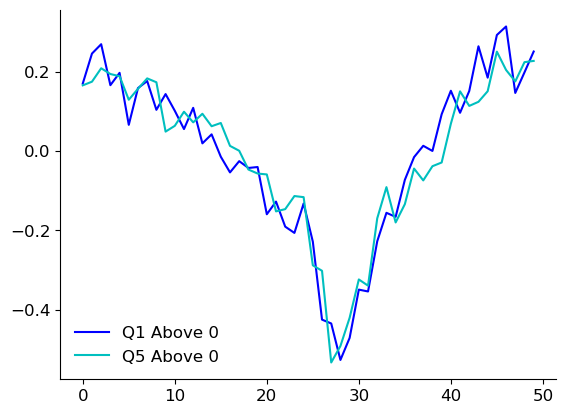

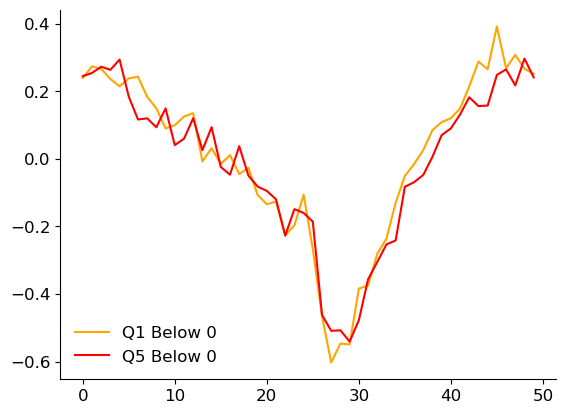

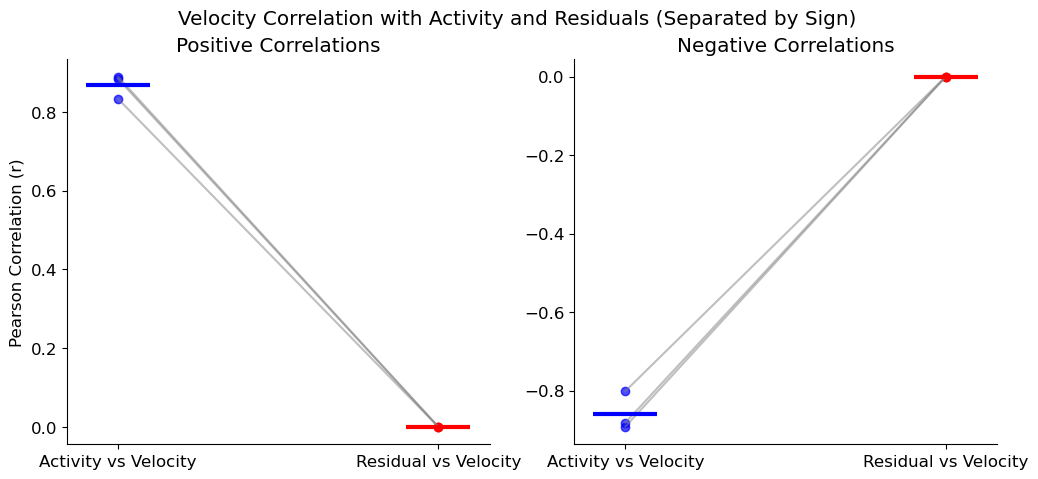

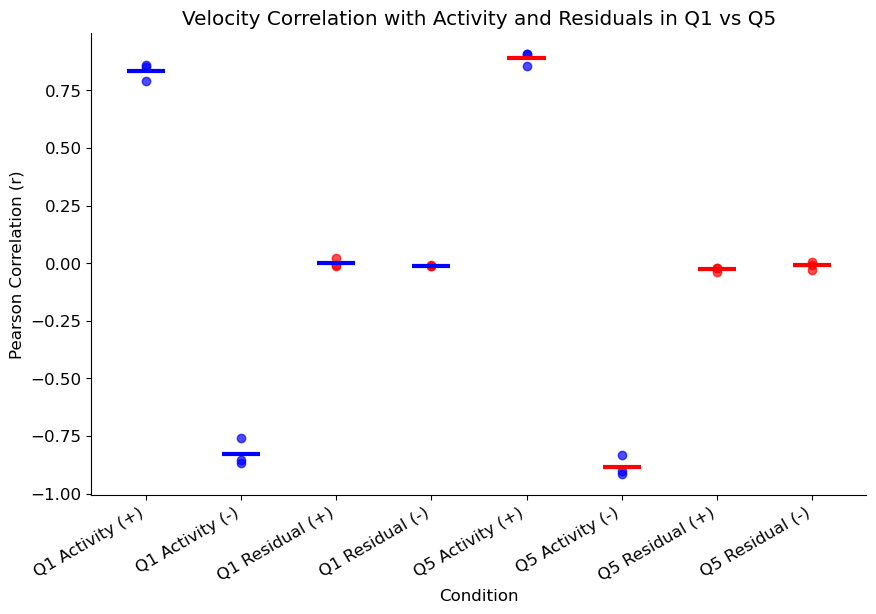

In [103]:
noise_sf=0.5

per_cell_velocity = []

for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        per_cell_velocity.append(factors_dict_SST[animal]['Velocity'])

        
x = np.arange(50)

activity_list = []

for animal in activity_dict_SST:
    for neuron in activity_dict_SST[animal]:
        activity_list.append(np.mean(activity_dict_SST[animal][neuron], axis=1))

neurons_array = np.stack(activity_list) 
combined_gaussian = np.mean(neurons_array, axis=0)
combined_gaussian = np.tile(combined_gaussian, (num_trials, 1)).T


weights_list_positive = [2, 5, 10]
weights_list_negative = [-2, -5, -10]

gaussian_positive = []
gaussian_negative = []

for weight in weights_list_positive:
    velocity_correlation = weight*velocity

    combined_gaussian_with_velocity = combined_gaussian + velocity_correlation.T

    combined_gaussian_with_velocity = (combined_gaussian_with_velocity - np.mean(combined_gaussian_with_velocity)) / np.std(combined_gaussian_with_velocity)

    noise = noise_sf * np.random.normal(0, 1, a.shape).T
    
    combined_gaussian_with_velocity = combined_gaussian_with_velocity + noise
    gaussian_positive.append(combined_gaussian_with_velocity.T)
    
for weight in weights_list_negative:
    velocity_correlation = weight*velocity

    combined_gaussian_with_velocity = combined_gaussian + velocity_correlation.T

    combined_gaussian_with_velocity = (combined_gaussian_with_velocity - np.mean(combined_gaussian_with_velocity)) / np.std(combined_gaussian_with_velocity)

    noise = noise_sf * np.random.normal(0, 1, a.shape).T
    combined_gaussian_with_velocity = combined_gaussian_with_velocity + noise
    gaussian_negative.append(combined_gaussian_with_velocity.T)
    

    
velocity = per_cell_velocity[0].T

positive_prediction_list = []
negative_prediction_list = []

for i in gaussian_positive:
    neuron_activity_flat = i.flatten()
    flattened_data = velocity.flatten()

    alphas=None

    model = RidgeCV(alphas=alphas if alphas is not None else [0.1, 1, 10, 100, 1000, 5000], cv=None)

    model.fit(flattened_data.reshape(-1, 1), neuron_activity_flat)

    neuron_predicted_activity = model.predict(flattened_data.reshape(-1, 1))

    neuron_predicted_activity = neuron_predicted_activity.reshape(velocity.shape)
    positive_prediction_list.append(neuron_predicted_activity)
    
for i in gaussian_negative:
    neuron_activity_flat = i.flatten()
    flattened_data = velocity.flatten()

    alphas=None

    model = RidgeCV(alphas=alphas if alphas is not None else [0.1, 1, 10, 100, 1000, 5000], cv=None)

    model.fit(flattened_data.reshape(-1, 1), neuron_activity_flat)

    neuron_predicted_activity = model.predict(flattened_data.reshape(-1, 1))

    neuron_predicted_activity = neuron_predicted_activity.reshape(velocity.shape)
    negative_prediction_list.append(neuron_predicted_activity)
    
residuals_list_positive = np.subtract(gaussian_positive, positive_prediction_list)
residuals_list_negative = np.subtract(gaussian_negative, negative_prediction_list)


num_trials = residual.shape[1] 
quintile_size = num_trials // 5

residual_q1 = residual[:, :quintile_size]  
residual_q5 = residual[:, -quintile_size:] 

gaussian_q1 = combined_gaussian_with_velocity[:, :quintile_size]
gaussian_q5 = combined_gaussian_with_velocity[:, -quintile_size:]


residual_list_pos_q1 = []
residual_list_pos_q5 = []
mean_residual_list_pos_q1 = []
mean_residual_list_pos_q5 = []

residual_vel_corr_pos_q1 = []
residual_vel_corr_pos_q5 = []
activity_vel_corr_pos_q1 = []
activity_vel_corr_pos_q5 = []

for idx, i in enumerate(residuals_list_positive):
    residual_q1 = i.T[:, :quintile_size]  
    residual_q5 = i.T[:, -quintile_size:]
    velocity_q1 = velocity.T[:, :quintile_size]  
    velocity_q5 = velocity.T[:, -quintile_size:]
    print(f"residual_q1.shape {residual_q1.shape}")
    print(f"velocity_q1.shape {velocity_q1.shape}")
    residual_list_pos_q1.append(residual_q1)
    residual_list_pos_q5.append(residual_q5)
    mean_residual_list_pos_q1.append(np.mean(residual_q1, axis=1))
    mean_residual_list_pos_q5.append(np.mean(residual_q5, axis=1))
    q1_corr, _ = pearsonr(residual_q1.flatten(), velocity_q1.flatten())
    q5_corr, _ = pearsonr(residual_q5.flatten(), velocity_q5.flatten())
    
    residual_vel_corr_pos_q1.append(q1_corr)
    residual_vel_corr_pos_q5.append(q5_corr)
    
    gaussian_q1 = gaussian_positive[idx].T[:, :quintile_size]  
    gaussian_q5 = gaussian_positive[idx].T[:, -quintile_size:] 
    
    print(f"gaussian_q1.shape {gaussian_q1.shape}")
    print(f"velocity_q1.shape {velocity_q1.shape}")
    
    q1_corr_activity, _ = pearsonr(gaussian_q1.flatten(), velocity_q1.flatten())
    q5_corr_activity, _ = pearsonr(gaussian_q5.flatten(), velocity_q5.flatten())
    activity_vel_corr_pos_q1.append(q1_corr_activity)
    activity_vel_corr_pos_q5.append(q5_corr_activity)
    
print(f"residual_vel_corr_pos_q1 {residual_vel_corr_pos_q1}")
print(f"residual_vel_corr_pos_q5 {residual_vel_corr_pos_q5}")
    
    
residual_list_neg_q1 = []
residual_list_neg_q5 = []
mean_residual_list_neg_q1 = []
mean_residual_list_neg_q5 = []

residual_vel_corr_neg_q1 = []
residual_vel_corr_neg_q5 = []
activity_vel_corr_neg_q1 = []
activity_vel_corr_neg_q5 = []

print(f"residual_vel_corr_neg_q1 {residual_vel_corr_neg_q1}")
print(f"residual_vel_corr_neg_q5 {residual_vel_corr_neg_q5}")

for idx, i in enumerate(residuals_list_negative):
    residual_q1 = i.T[:, :quintile_size]  
    residual_q5 = i.T[:, -quintile_size:]
    velocity_q1 = velocity.T[:, :quintile_size]  
    velocity_q5 = velocity.T[:, -quintile_size:]
    residual_list_neg_q1.append(residual_q1)
    residual_list_neg_q5.append(residual_q5)
    mean_residual_list_neg_q1.append(np.mean(residual_q1, axis=1))
    mean_residual_list_neg_q5.append(np.mean(residual_q5, axis=1))
    q1_corr, _ = pearsonr(residual_q1.flatten(), velocity_q1.flatten())
    q5_corr, _ = pearsonr(residual_q5.flatten(), velocity_q5.flatten())
    residual_vel_corr_neg_q1.append(q1_corr)
    residual_vel_corr_neg_q5.append(q5_corr)
    
    gaussian_q1 = gaussian_negative[idx].T[:, :quintile_size]  
    gaussian_q5 = gaussian_negative[idx].T[:, -quintile_size:]
    
    q1_corr_activity, _ = pearsonr(gaussian_q1.flatten(), velocity_q1.flatten())
    q5_corr_activity, _ = pearsonr(gaussian_q5.flatten(), velocity_q5.flatten())
    activity_vel_corr_neg_q1.append(q1_corr_activity)
    activity_vel_corr_neg_q5.append(q5_corr_activity)
    
        
        
activity_velocity_positive = []
activity_velocity_negative = []

residual_velocity_positive = []
residual_velocity_negative = []


for i in range(len(residual_list_pos_q1)):
    raw_positive = gaussian_positive[i].flatten()
    raw_negative = gaussian_negative[i].flatten()
    res_pos = residuals_list_positive[i].flatten()
    res_neg = residuals_list_negative[i].flatten()
    flat_velocity = velocity.flatten()
    positive_correlation, _ = pearsonr(raw_positive, flat_velocity)
    negative_correlation, _ = pearsonr(raw_negative, flat_velocity)
    activity_velocity_positive.append(positive_correlation)
    activity_velocity_negative.append(negative_correlation)
    res_pos_corr, _ = pearsonr(res_pos, flat_velocity)
    res_neg_corr, _ = pearsonr(res_neg, flat_velocity)
    residual_velocity_positive.append(res_pos_corr)
    residual_velocity_negative.append(res_neg_corr)

    
mean_residual_list_pos_q1_array = np.stack(mean_residual_list_pos_q1)
mean_residual_list_pos_q1_array = np.mean(mean_residual_list_pos_q1_array, axis=0)

mean_residual_list_pos_q5_array = np.stack(mean_residual_list_pos_q5)
mean_residual_list_pos_q5_array = np.mean(mean_residual_list_pos_q5_array, axis=0)

mean_residual_list_neg_q1_array = np.stack(mean_residual_list_neg_q1)
mean_residual_list_neg_q1_array = np.mean(mean_residual_list_neg_q1_array, axis=0)

mean_residual_list_neg_q5_array = np.stack(mean_residual_list_neg_q5)
mean_residual_list_neg_q5_array = np.mean(mean_residual_list_neg_q5_array, axis=0)


plt.figure()
plt.plot(mean_residual_list_pos_q1_array, color='b', label="Q1 Above 0")
plt.plot(mean_residual_list_pos_q5_array, color='c', label="Q5 Above 0")
plt.legend()
plt.show()

plt.figure()
plt.plot(mean_residual_list_neg_q1_array, color='orange', label="Q1 Below 0")
plt.plot(mean_residual_list_neg_q5_array, color='r', label="Q5 Below 0")
plt.legend()
plt.show()

#############################################################


min_len_pos = min(len(activity_velocity_positive), len(residual_velocity_positive))
min_len_neg = min(len(activity_velocity_negative), len(residual_velocity_negative))

# Truncate lists to match the minimum length
activity_velocity_positive = activity_velocity_positive[:min_len_pos]
residual_velocity_positive = residual_velocity_positive[:min_len_pos]

activity_velocity_negative = activity_velocity_negative[:min_len_neg]
residual_velocity_negative = residual_velocity_negative[:min_len_neg]

# Define x positions for Activity vs Velocity (x=1) and Residual vs Velocity (x=2)
x_pos_activity = np.full(len(activity_velocity_positive), 1)
x_pos_residual = np.full(len(residual_velocity_positive), 2)

x_neg_activity = np.full(len(activity_velocity_negative), 1)
x_neg_residual = np.full(len(residual_velocity_negative), 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Positive Correlations Plot
axes[0].scatter(x_pos_activity, activity_velocity_positive, color='b', alpha=0.7, label="Activity Positive")
axes[0].scatter(x_pos_residual, residual_velocity_positive, color='r', alpha=0.7, label="Residual Positive")

for i in range(len(activity_velocity_positive)):
    axes[0].plot([1, 2], [activity_velocity_positive[i], residual_velocity_positive[i]], color='gray', alpha=0.5)

# Mean horizontal lines
axes[0].hlines(np.mean(activity_velocity_positive), 0.9, 1.1, color='b', linewidth=3)
axes[0].hlines(np.mean(residual_velocity_positive), 1.9, 2.1, color='r', linewidth=3)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["Activity vs Velocity", "Residual vs Velocity"])
axes[0].set_ylabel("Pearson Correlation (r)")
axes[0].set_title("Positive Correlations")

# Negative Correlations Plot
axes[1].scatter(x_neg_activity, activity_velocity_negative, color='b', alpha=0.7, label="Activity Negative")
axes[1].scatter(x_neg_residual, residual_velocity_negative, color='r', alpha=0.7, label="Residual Negative")

for i in range(len(activity_velocity_negative)):
    axes[1].plot([1, 2], [activity_velocity_negative[i], residual_velocity_negative[i]], color='gray', alpha=0.5)

# Mean horizontal lines
axes[1].hlines(np.mean(activity_velocity_negative), 0.9, 1.1, color='b', linewidth=3)
axes[1].hlines(np.mean(residual_velocity_negative), 1.9, 2.1, color='r', linewidth=3)

axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(["Activity vs Velocity", "Residual vs Velocity"])
axes[1].set_title("Negative Correlations")

plt.suptitle("Velocity Correlation with Activity and Residuals (Separated by Sign)")
plt.show()



#####################################################################

q1_corr_values = [
    activity_vel_corr_pos_q1, activity_vel_corr_neg_q1,
    residual_vel_corr_pos_q1, residual_vel_corr_neg_q1
]

q5_corr_values = [
    activity_vel_corr_pos_q5, activity_vel_corr_neg_q5,
    residual_vel_corr_pos_q5, residual_vel_corr_neg_q5
]

labels = ["Q1 Activity (+)", "Q1 Activity (-)", "Q1 Residual (+)", "Q1 Residual (-)",
          "Q5 Activity (+)", "Q5 Activity (-)", "Q5 Residual (+)", "Q5 Residual (-)"]

x_positions_q1 = np.arange(1, 5)
x_positions_q5 = np.arange(5, 9)

plt.figure(figsize=(10, 6))

# Plot Q1 correlations
for i, data in enumerate(q1_corr_values):
    plt.scatter([x_positions_q1[i]] * len(data), data, color='b' if "Activity" in labels[i] else 'r', alpha=0.7)

# Plot Q5 correlations
for i, data in enumerate(q5_corr_values):
    plt.scatter([x_positions_q5[i]] * len(data), data, color='b' if "Activity" in labels[i + 4] else 'r', alpha=0.7)

# Mean lines
means_q1 = [np.mean(data) for data in q1_corr_values]
means_q5 = [np.mean(data) for data in q5_corr_values]

plt.hlines(means_q1, x_positions_q1 - 0.2, x_positions_q1 + 0.2, color='b', linewidth=3)
plt.hlines(means_q5, x_positions_q5 - 0.2, x_positions_q5 + 0.2, color='r', linewidth=3)

plt.xticks(np.concatenate([x_positions_q1, x_positions_q5]), labels, rotation=30, ha="right")
plt.xlabel("Condition")
plt.ylabel("Pearson Correlation (r)")
plt.title("Velocity Correlation with Activity and Residuals in Q1 vs Q5")
plt.show()

